In [ ]:
# Library yang digunakan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Load the data
df = pd.read_csv("hasil_TextPreProcessing_shopee.csv")
df.head()

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Gimana sih orang shopee ini aplikasinya berat ...,1,Negatif,gimana sih orang shopee ini aplikasinya berat ...,gimana sih orang shopee aplikasinya berat liha...,"['gimana', 'sih', 'orang', 'shopee', 'aplikasi...",gimana sih orang shopee aplikasi berat lihat l...
1,Dah bagus cuma sering ngelag aja kalo pencet k...,5,Positif,dah bagus cuma sering ngelag aja kalo pencet k...,dah bagus ngelag aja kalo pencet keranjang kal...,"['dah', 'bagus', 'ngelag', 'aja', 'kalo', 'pen...",dah bagus ngelag aja kalo pencet keranjang kal...
2,Kalo skr blanja di Shopee dikemasnya smpi 2 at...,5,Positif,kalo skr blanja di shopee dikemasnya smpi ata...,kalo skr blanja shopee dikemasnya smpi haribel...,"['kalo', 'skr', 'blanja', 'shopee', 'dikemasny...",kalo skr blanja shopee kemas smpi haribelum se...
3,Mau login aja di persulit sama sitem nya yang ...,1,Negatif,mau login aja di persulit sama sitem nya yang ...,login aja persulit sitem nya gangguan wow memb...,"['login', 'aja', 'persulit', 'sitem', 'nya', '...",login aja sulit sitem nya ganggu wow bantu edi...
4,Aku beri bintang empat karena : Masa gabisa co...,4,Positif,aku beri bintang empat karena masa gabisa cod...,bintang gabisa cod gabisa diantar ditempat mur...,"['bintang', 'gabisa', 'cod', 'gabisa', 'dianta...",bintang gabisa cod gabisa antar tempat murah g...


In [ ]:
# Menghitung jumlah label positif dan negatif
positif_count = (df['Label'] == 'Positif').sum()
negatif_count = (df['Label'] == 'Negatif').sum()

# Menampilkan hasil
print(f"Jumlah label positif: {positif_count}")
print(f"Jumlah label negatif: {negatif_count}")

Jumlah label positif: 280
Jumlah label negatif: 395


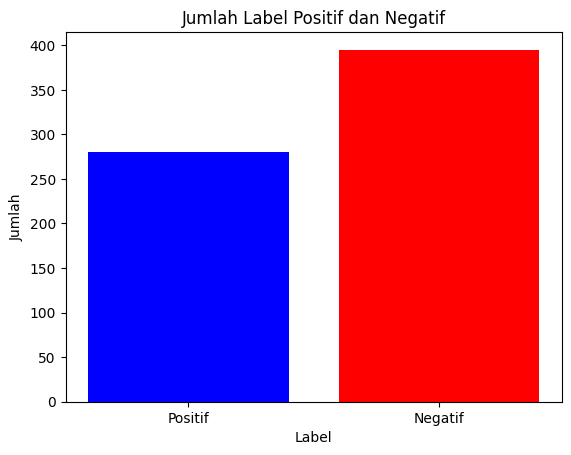

In [ ]:
# Menampilkan hasil dalam bentuk plot
labels = ['Positif', 'Negatif']
counts = [positif_count, negatif_count]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Jumlah Label Positif dan Negatif')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['Label'], test_size=0.2, random_state=42)

In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(540,)
(540,)
(135,)
(135,)


In [ ]:
# Define the Naive Bayes model
nb = MultinomialNB()

# Define the hyperparameter tuning space
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best-performing model and its hyperparameters
best_nb = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

In [ ]:
# Evaluate the best-performing model on the testing data
y_pred = best_nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="binary", pos_label="Negatif"))
print("Recall:", recall_score(y_test, y_pred, average="binary", pos_label="Negatif"))
print("F1_score:", f1_score(y_test, y_pred, average="binary", pos_label="Negatif"))

print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print('====================================================\n')

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8074074074074075
Precision: 0.8
Recall: 0.9156626506024096
F1_score: 0.8539325842696628
Confusion Matrix:
 [[76  7]
 [19 33]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.80      0.92      0.85        83
     Positif       0.82      0.63      0.72        52

    accuracy                           0.81       135
   macro avg       0.81      0.78      0.79       135
weighted avg       0.81      0.81      0.80       135



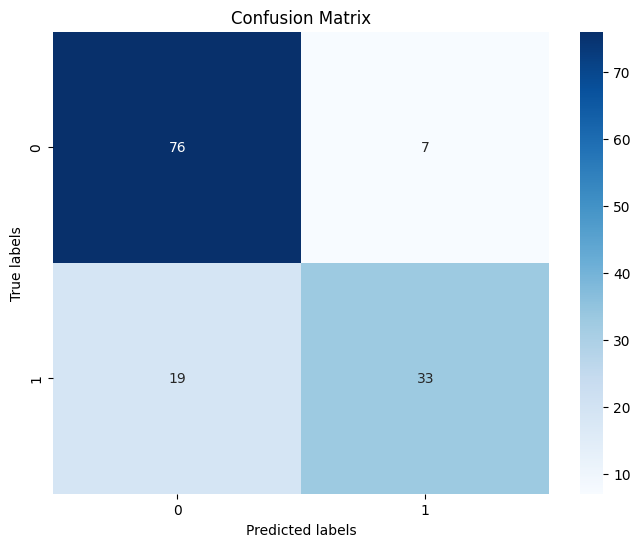

In [ ]:
# Plot the heatmap of the confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()